<a href="https://colab.research.google.com/github/BFvandy/Nissan-Text-Mining-POC-with-Transformer/blob/main/SW_Verbatim_Baseline_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Prep


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
!pip install langdetect
from langdetect import detect
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 9.7 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=f27a1f251ddca91a2c8d4a738a2f235daffb540a1fde7ad41f3a89072c02703d
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
cur_path = "/content/drive/My Drive/Nissan Internship"
os.chdir(cur_path)
!pwd

/content/drive/My Drive/Nissan Internship


# Load Transformer

!pwd
Check where is now

In [ ]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.9 MB/s 
     |████████████████████████████████| 6.6 MB 51.0 MB/s 
     |████████████████████████████████| 596 kB 26.4 MB/s 
     |████████████████████████████████| 101 kB 12.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli", device=0)

In [ ]:
sequence_to_classify = "I purchased a new Civic in 2006, I knew the Honda quality ."
candidate_labels = ['I love Honda', 'I hate Honda', 'What about Honda']
classifier(sequence_to_classify, candidate_labels)

{'labels': ['I love Honda', 'What about Honda', 'I hate Honda'],
 'scores': [0.5322352051734924, 0.46602582931518555, 0.0017389195272698998],
 'sequence': 'I purchased a new Civic in 2006, I knew the Honda quality .'}

In [ ]:
cur_path = "/content/drive/My Drive/Nissan Internship/SW 2020-2022 Verbatim Small SUV"
os.chdir(cur_path)
!pwd

/content/drive/My Drive/Nissan Internship/SW 2020-2022 Verbatim Small SUV


# Data Preprocessing

In [ ]:
fun_labels = ['Dependable', 'Lasts long', 'Value for money', 'Quality fit and finish', 'Attractive styling'
                                    , 'Safe', 'Retains resale value', 'Driver comfort', 'Fun to drive', 
                                    'Advanced features', 'Responsive handling', 'Prestigious', 'Dealerships', 
        'Fuel efficient', 'Quick acceleration', 'Environmentally friendly', 'Affordable']
lower_labels = [i.lower() for i in fun_labels]

In [ ]:
# data structure
comments[lower_labels] = pd.NaT
comments.head(5)

,Purchased,Purchased Year,Disposed,Disposed Model Year,Rejected,Rejected Model Year,Sentiment,Age Range,Gender,Ethnicity,...,driver comfort,fun to drive,advanced features,responsive handling,prestigious,dealerships,fuel efficient,quick acceleration,environmentally friendly,affordable
0,Honda CR-V Special Edition FWD,2021,Honda Civic,2019.0,Honda HR-V,2022.0,Sentiment Not Calculated,Age 41,Female,White,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,Nissan Rogue SV AWD,2021,Ford Fusion,2012.0,Toyota Highlander,2021.0,Sentiment Not Calculated,Age 35,Male,White,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,Nissan Rogue S AWD,2021,Chevrolet Spark,2016.0,Hyundai Santa Fe,2021.0,Sentiment Not Calculated,Age 57,Male,White,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,Honda CR-V EX/EX-L FWD,2022,Nissan Versa Note (Hatchback),2018.0,Lexus LX,2022.0,Sentiment Not Calculated,Age 49,Female,Asian,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,Honda CR-V EX/EX-L FWD,2022,(None),NaN,Honda Civic,2015.0,Sentiment Not Calculated,Age 54,Female,White,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [ ]:
# # Drop language other than English

# for i in range(len(comments)):
#   try:
#     if detect(comments['Verbatim Text'][i]) == 'en':
#       pass
#     else:
#       comments = comments.drop(comments.index[i])
#   except:
#     comments = comments.drop(comments.index[i])

In [ ]:
# # Drop reviews that are too long or too short

# too_long = 250
# too_short = 1

# comments.drop(comments.loc[comments['word count']>too_long].index, inplace=True)
# comments.drop(comments.loc[comments['word count']<=too_short].index, inplace=True)

In [ ]:
# comments.groupby('word count')['Make'].count()

word count
2      555
3      614
4      690
5      716
6      653
      ... 
198      1
200      1
201      1
233      1
238      1
Name: Make, Length: 143, dtype: int64

# Apply Transformer


In [ ]:
import time

start = time.time()

for i in range(5):
  try:
    res = classifier(comments.at[i, 'Verbatim Text'].lower(), lower_labels, multi_label=True)
    comments.at[i, lower_labels] = dict(zip(res['labels'], res['scores']))
  except:
    pass

end = time.time()
print((end - start)/60)


0.13849236170450846


Test the pipeline


In [ ]:
comments.head(5)

,index,Make,Model,Purchased,Purchased Year,Disposed,Disposed Model Year,Rejected,Rejected Model Year,Sentiment,...,fun to drive,advanced features,responsive handling,prestigious,dealerships,fuel efficient,quick acceleration,environmentally friendly,affordable,word count
0,7,Honda,CR-V,Honda CR-V EX/EX-L AWD,2021,Honda HR-V,2019.0,(None),NaN,Sentiment Not Calculated,...,0.000758,0.246038,0.201452,0.171341,0.350399,0.040023,0.384421,0.107624,0.155834,238
1,8,Honda,CR-V,Honda CR-V Touring AWD,2021,Toyota RAV4,2018.0,Toyota RAV4,2022.0,Sentiment Not Calculated,...,0.005377,0.842309,0.012831,0.359185,0.10228,0.006028,0.927011,0.014403,0.038697,233
2,9,Honda,CR-V,Honda CR-V Touring Hybrid AWD,2022,Honda CR-V,2009.0,Volvo XC40,2022.0,Sentiment Not Calculated,...,0.026209,0.786786,0.89057,0.420698,0.949274,0.116875,0.776169,0.070178,0.143392,200
3,11,Honda,CR-V,Honda CR-V Touring Hybrid AWD,2021,Volvo S60 Sedan,2013.0,Mini Cooper Countryman,2021.0,Sentiment Not Calculated,...,0.007095,0.452818,0.443661,0.128603,0.973705,0.076418,0.340836,0.0236,0.008853,201
4,12,Honda,CR-V,Honda CR-V Touring Hybrid AWD,2022,(None),NaN,Tesla Model S,2022.0,Sentiment Not Calculated,...,0.911459,0.526149,0.657898,0.637899,0.893952,0.260131,0.26962,0.264805,0.540153,198


In [ ]:
import time

start = time.time()

row_n = comments.shape[0]
for i in range(row_n):
    try:
      res = classifier(comments.at[i, 'Verbatim Text'].lower(), lower_labels, multi_label=True)
      comments.at[i, lower_labels] = dict(zip(res['labels'], res['scores']))
    except:
      pass
    
end = time.time()
print((end - start)/60)

comments.to_csv('comments_score.csv', index=False)

print("Save it")

/usr/local/lib/python3.7/dist-packages/transformers/pipelines/base.py:1039: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  UserWarning,


Apply Zero-Shot

In [ ]:
comments.head(10)

,Purchased,Purchased Year,Disposed,Disposed Model Year,Rejected,Rejected Model Year,Sentiment,Age Range,Gender,Ethnicity,...,driver comfort,fun to drive,advanced features,responsive handling,prestigious,dealerships,fuel efficient,quick acceleration,environmentally friendly,affordable
0,Honda CR-V Special Edition FWD,2021,Honda Civic,2019.0,Honda HR-V,2022.0,Sentiment Not Calculated,Age 41,Female,White,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,Nissan Rogue SV AWD,2021,Ford Fusion,2012.0,Toyota Highlander,2021.0,Sentiment Not Calculated,Age 35,Male,White,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,Nissan Rogue S AWD,2021,Chevrolet Spark,2016.0,Hyundai Santa Fe,2021.0,Sentiment Not Calculated,Age 57,Male,White,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,Honda CR-V EX/EX-L FWD,2022,Nissan Versa Note (Hatchback),2018.0,Lexus LX,2022.0,Sentiment Not Calculated,Age 49,Female,Asian,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,Honda CR-V EX/EX-L FWD,2022,(None),NaN,Honda Civic,2015.0,Sentiment Not Calculated,Age 54,Female,White,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
5,Honda CR-V Touring AWD,2022,(None),NaN,Ford Edge,2022.0,Sentiment Not Calculated,Age 64,Female,White,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
6,Honda CR-V Touring Hybrid AWD,2022,Honda CR-V,2006.0,Toyota RAV4,2022.0,Sentiment Not Calculated,Age 63,Female,White,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
7,Honda CR-V EX/EX-L AWD,2021,Honda HR-V,2019.0,(None),NaN,Sentiment Not Calculated,Age 65,Female,White,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
8,Honda CR-V Touring AWD,2021,Toyota RAV4,2018.0,Toyota RAV4,2022.0,Sentiment Not Calculated,Age 39,Female,White,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
9,Honda CR-V Touring Hybrid AWD,2022,Honda CR-V,2009.0,Volvo XC40,2022.0,Sentiment Not Calculated,Age Unknown,Female,Asian,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


The shape attribute for numpy arrays returns the dimensions of the array. If Y has n rows and m columns, then Y.shape is (n,m). So Y.shape[0] is n.

multi_label=True: allow different attributes to be processed at the same time.
res is a dictionary that contains three elements, as shown in code before.

# See Direct Application of Zero-shot Performance

In [ ]:
comments_score = pd.read_csv('comments_score.csv')

In [ ]:
comments_score.dropna(subset= lower_labels)
# Drop na for all the functional attributes

,Make,Model,Purchased,Purchased Year,Disposed,Disposed Model Year,Rejected,Rejected Model Year,Sentiment,Age Range,...,fun to drive,advanced features,responsive handling,prestigious,dealerships,fuel efficient,quick acceleration,environmentally friendly,affordable,word count


In [ ]:
sum_scores = comments_score.groupby('Model')[lower_labels].mean()
sum_scores

,dependable,lasts long,value for money,quality fit and finish,attractive styling,safe,retains resale value,driver comfort,fun to drive,advanced features,responsive handling,prestigious,dealerships,fuel efficient,quick acceleration,environmentally friendly,affordable
Model,,,,,,,,,,,,,,,,,
Bronco Sport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CR-V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CX-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Equinox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Escape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Forester,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RAV4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rogue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sportage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sum_scores_transposed = sum_scores.T
sum_scores_transposed

Model,Bronco Sport,CR-V,CX-5,Equinox,Escape,Forester,RAV4,Rogue,Sportage,Tucson
dependable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lasts long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
value for money,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quality fit and finish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attractive styling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
safe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retains resale value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
driver comfort,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fun to drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
advanced features,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


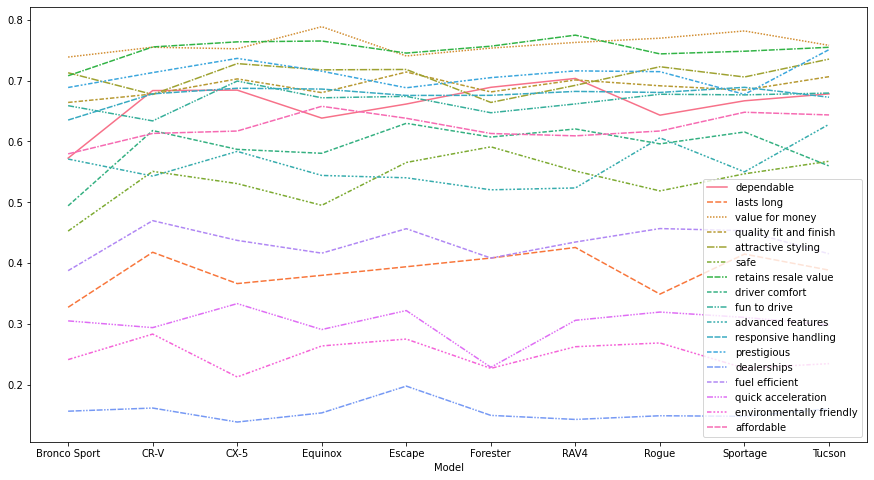

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=sum_scores)

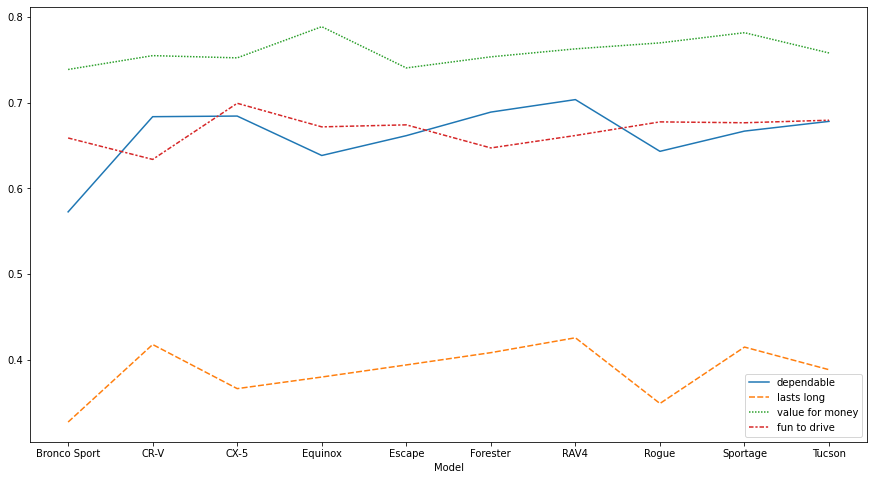

In [ ]:
selected_scores = sum_scores.loc[:, ['dependable', 'lasts long', 'value for money','fun to drive']]
plt.figure(figsize=(15,8))
sns.lineplot(data=selected_scores)

In [ ]:
wordn_funattri = comments_score.groupby('word count')[lower_labels].mean()
wordn_funattri

,dependable,lasts long,value for money,quality fit and finish,attractive styling,safe,retains resale value,driver comfort,fun to drive,advanced features,responsive handling,prestigious,dealerships,fuel efficient,quick acceleration,environmentally friendly,affordable
word count,,,,,,,,,,,,,,,,,
1,0.345217,0.626381,0.464550,0.426732,0.379312,0.459832,0.676922,0.557066,0.353374,0.505130,0.404824,0.485070,0.170587,0.205025,0.354975,0.308930,0.314982
2,0.850730,0.520964,0.789620,0.793862,0.781224,0.577303,0.881240,0.605018,0.741706,0.652198,0.786262,0.853776,0.207452,0.500654,0.372338,0.380351,0.696217
3,0.805396,0.461901,0.764463,0.759979,0.723267,0.546368,0.847768,0.568285,0.680208,0.620359,0.732845,0.831778,0.199884,0.425053,0.311374,0.285792,0.659711
4,0.761186,0.419753,0.779900,0.729777,0.715839,0.547912,0.805653,0.593222,0.686868,0.610569,0.733208,0.799725,0.163703,0.488284,0.326577,0.289782,0.665044
5,0.761461,0.421001,0.803818,0.739179,0.726895,0.580058,0.794815,0.604689,0.695375,0.597878,0.740092,0.779397,0.178442,0.509289,0.310976,0.286759,0.676081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.030307,0.863467,0.183424,0.956295,0.998324,0.465973,0.950808,0.994435,0.066644,0.605155,0.679747,0.610117,0.243971,0.062102,0.692068,0.097811,0.597148
310,0.013384,0.603629,0.058307,0.079740,0.280578,0.037628,0.429641,0.978628,0.012258,0.687348,0.339302,0.094201,0.160111,0.103527,0.376823,0.196153,0.140515
368,0.995154,0.808708,0.987630,0.998040,0.999223,0.970488,0.972409,0.968989,0.999545,0.992046,0.997898,0.985388,0.094825,0.946003,0.638300,0.479406,0.887145


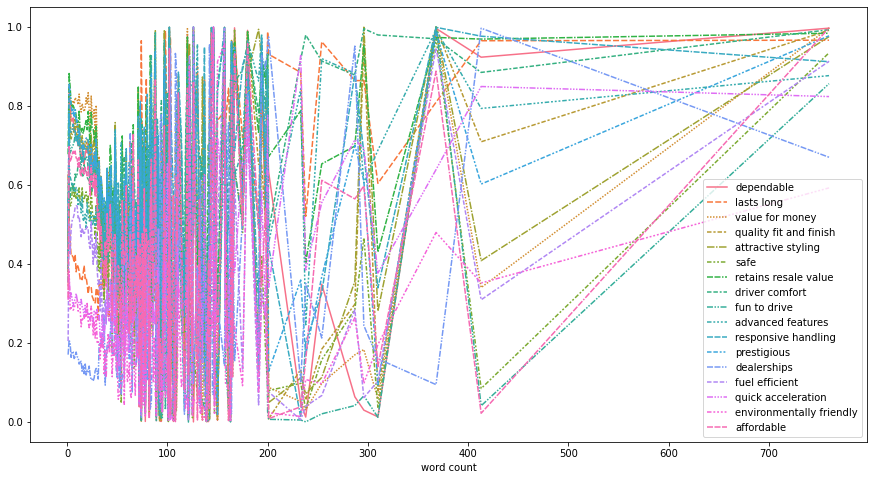

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=wordn_funattri)
# line plot for reviews with word count from min to max (0-800+)

In [ ]:
comments.to_csv('comments_score.csv', index=False)